In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df_train = pd.read_json('E:/tulip-flip/flip01/data/train.json')
df_test = pd.read_json('E:/tulip-flip/flip01/data//test.json')

In [4]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
df_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [6]:
#Train set
ingredients_train = df_train.ingredients
words_train = [' '.join(x) for x in ingredients_train]
print(len(words_train), words_train[0])

#Test set
ingredients_test = df_test.ingredients
words_test = [' '.join(x) for x in ingredients_test]

39774 romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles


In [7]:
vectorizer = CountVectorizer(max_features = 1000)
bag_of_words = vectorizer.fit(words_train)
bag_of_words

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [8]:
ing_array_train = bag_of_words.transform(words_train).toarray()
ing_array_test = bag_of_words.transform(words_test).toarray()
ing_array_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
df_ing_train = pd.DataFrame(ing_array_train, columns=vectorizer.vocabulary_)
df_ing_test = pd.DataFrame(ing_array_test, columns=vectorizer.vocabulary_)
df_ing_train.head()

,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,purple,onion,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
df_train_new = df_train.merge(df_ing_train, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
df_train_new.head()

,cuisine,id,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,filipino,20130,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,indian,22213,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
df_test_new = df_test.merge(df_ing_test, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
df_test_new.head()

,id,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,purple,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,18009,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29752,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,35687,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df_train_new.drop(['id', 'cuisine'], axis=1)
y = df_train_new.cuisine
X.shape, y.shape

((39774, 1000), (39774,))

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85)
X_train.shape, X_val.shape

((33807, 1000), (5967, 1000))

In [14]:
m = RandomForestClassifier(oob_score=True)
m.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
m.oob_score_, m.score(X_val, y_val)

(0.614843079835537, 0.7114127702362997)

In [16]:
def create_model(n_words, n_trees, train, test, words=None):
    #create vectorized df's
    df_train, df_test = vect_train_test(train, test, n_words, words)
    
    X = df_train.drop(['id', 'cuisine'], axis=1)
    y = df_train.cuisine
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85)
    
    m = RandomForestClassifier(n_estimators=n_trees, oob_score=True)
    m.fit(X_train, y_train)
    
    moob_score = m.oob_score_
    score = m.score(X_val, y_val)
    model = m
    
    return moob_score, score, model

def vect_train_test(dftrain, dftest, n_words=1000, words=None):
    vectorizer = CountVectorizer(max_features = n_words)
    ingredients_train = dftrain.ingredients
    words_train = [' '.join(x) for x in ingredients_train]
    ingredients_test = dftest.ingredients
    words_test = [' '.join(x) for x in ingredients_test]
    if isinstance(words, pd.Series):
        bag_of_words = vectorizer.fit(words)
    else:
        bag_of_words = vectorizer.fit(words_train)
        
        ing_array_train = bag_of_words.transform(words_train).toarray()
    ing_array_test = bag_of_words.transform(words_test).toarray()

    df_ing_train = pd.DataFrame(ing_array_train, columns=vectorizer.vocabulary_)
    df_ing_test = pd.DataFrame(ing_array_test, columns=vectorizer.vocabulary_)

    df_train = dftrain.merge(df_ing_train, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
    df_test= dftest.merge(df_ing_test, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
    return df_train, df_test

def run_variations(variations, target):
    models = []
    for var in variations:
        moob_score, score, model = create_model(var[0], var[1], df_train, df_test)
        models.append({'n_vectors': var[0],
                       'n_trees': var[1],
                       'moob_score': moob_score,
                      'score': score,
                      'model': model})
        print(var, moob_score, score)
    if target == 'vector':
        plot_vector_score(models)
    elif target == 'trees':
        plot_ntree_score(models)
    return models

def plot_vector_score(models):
    plt.plot([x['n_vectors'] for x in models], [y['moob_score'] for y in models])
    plt.title('Score increase from Vector increase')
    plt.xlabel('Word vector size')
    plt.ylabel('Score')
    plt.show()
    return

def plot_ntree_score(models):
    plt.plot([x['n_trees'] for x in models], [y['moob_score'] for y in models])
    plt.title('Score increase from number of estimators (trees) increase')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Score (350 word vector)')
    plt.show()
    return

In [17]:
top = sorted(list(zip(X_val.columns, 
                      m.feature_importances_)), key=lambda x: x[1], reverse=True)[:200]

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0, flags=flags)


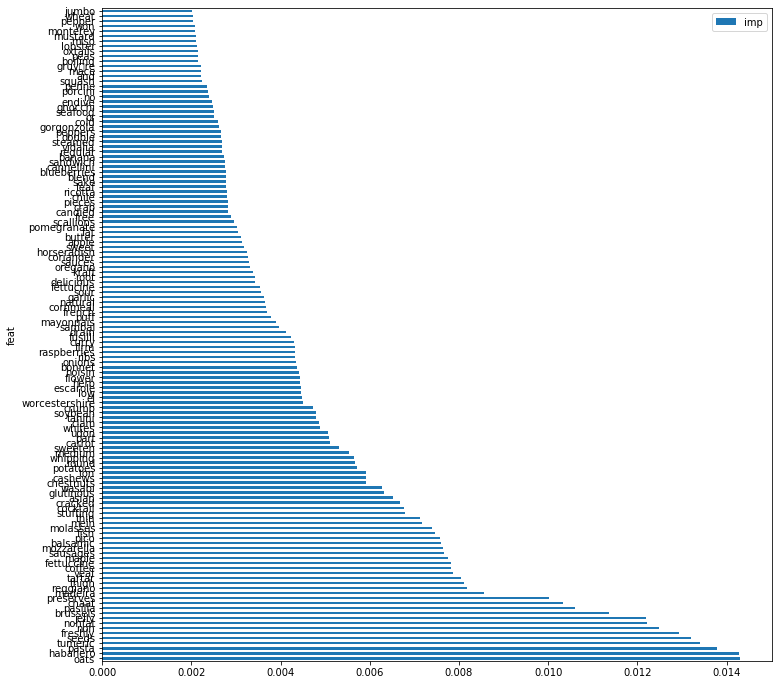

In [18]:
df_imp = pd.DataFrame(top, columns=['feat', 'imp'])
df_imp.imp = df_imp.imp.astype(float)
df_imp[df_imp.imp > 0.002].plot('feat', 'imp', kind='barh', figsize=(12,12))

In [19]:
df_keep = df_imp[df_imp.imp > 0.004]
new_ing = df_keep.feat

In [20]:
#Reducing features to the most significants did not improve results...
moob_score, score, m = create_model(350, 30, df_train, df_test, new_ing)
moob_score, score

UnboundLocalError: local variable 'ing_array_train' referenced before assignment

(100, 30) 0.6225042151033809 0.6507457683928272
(150, 30) 0.662702990504925 0.6837606837606838
(200, 30) 0.6740024255331736 0.7083961789844143
(300, 30) 0.6968675126453101 0.7229763700351935
(350, 30) 0.6999733782944361 0.7192894251717781
(500, 30) 0.7114502913597776 0.7360482654600302
(700, 30) 0.7119827254710563 0.7558236970001676


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


(1000, 30) 0.7159759813056468 0.7497905144963969
(1300, 30) 0.7158872422871003 0.7444276856041562


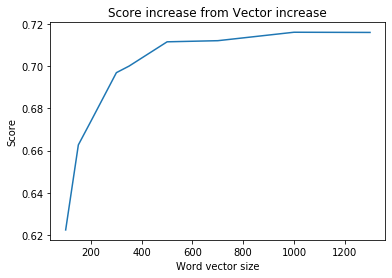

In [21]:
variations_1 = [(100, 30),
             (150, 30),
             (200, 30),
             (300, 30),
             (350, 30),
             (500, 30),
             (700, 30),
             (1000, 30),
             (1300, 30)]

models_1 = run_variations(variations_1, 'vector')

In [22]:
moob_score, score, m = create_model(1000, 300, df_train, df_test) #after running variations these values seemed the best right now..

In [23]:
moob_score, score

(0.7592806223563168, 0.7541478129713424)

In [24]:
X_test = df_test_new.drop('id', axis=1)
y_test = m.predict(X_test)
y_test

array(['southern_us', 'southern_us', 'italian', ..., 'italian',
       'southern_us', 'mexican'], dtype=object)

In [25]:
df_sub = pd.DataFrame(np.array([df_test.id, y_test]).T, 
                      columns=['id', 'cuisine']).set_index('id')

df_sub.head()

,cuisine
id,
18009,southern_us
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian
